In [40]:
import numpy as np


def roc_curve(y_true, y_prob, thresholds):
    fpr = []
    tpr = []

    for threshold in thresholds:
        y_pred = np.where(y_prob >= threshold, 1, 0)

        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))

        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))

        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))

    return [fpr,tpr]

In [41]:

M1 = [0.73,
      0.69,
      0.44,
      0.55,
      0.67,
      0.47,
      0.08,
      0.15,
      0.45,
      0.35]
M2 = [0.61,
      0.03,
      0.68,
      0.31,
      0.45,
      0.09,
      0.38,
      0.05,
      0.01,
      0.04]
OUT = [1,
       1,
       0,
       0,
       1,
       1,
       0,
       0,
       1,
       0]

d = {'OUT': OUT, 'M1': M1, 'M2': M2}

import  pandas as pd
df = pd.DataFrame(d)
df

,OUT,M1,M2
0,1,0.73,0.61
1,1,0.69,0.03
2,0,0.44,0.68
3,0,0.55,0.31
4,1,0.67,0.45
5,1,0.47,0.09
6,0,0.08,0.38
7,0,0.15,0.05
8,1,0.45,0.01
9,0,0.35,0.04


In [42]:
threshold=0
df['M1_OUT']=np.where(df['M1'] >= threshold, 1, 0)
df['M2_OUT']=np.where(df['M2'] >= threshold, 1, 0)
df

,OUT,M1,M2,M1_OUT,M2_OUT
0,1,0.73,0.61,1,1
1,1,0.69,0.03,1,1
2,0,0.44,0.68,1,1
3,0,0.55,0.31,1,1
4,1,0.67,0.45,1,1
5,1,0.47,0.09,1,1
6,0,0.08,0.38,1,1
7,0,0.15,0.05,1,1
8,1,0.45,0.01,1,1
9,0,0.35,0.04,1,1


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['OUT'], df['M1_OUT'])

array([[0, 5],
       [0, 5]], dtype=int64)

In [35]:

# from sklearn import metrics
# metrics.roc_curve(df['OUT'], df['M1'], pos_label=1)


In [44]:
roc_curve(y_true=df['OUT'],y_prob=df['M1'],thresholds=[0,0.25,0.5,0.75,1])

[[1.0, 0.6, 0.2, 0.0, 0.0], [1.0, 1.0, 0.6, 0.0, 0.0]]

In [45]:
roc_curve(y_true=df['OUT'],y_prob=df['M2'],thresholds=[0,0.25,0.5,0.75,1])

[[1.0, 0.6, 0.2, 0.0, 0.0], [1.0, 0.4, 0.2, 0.0, 0.0]]

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(df['OUT'], df['M1'])

M1: ROC AUC=0.920
M2: ROC AUC=0.400


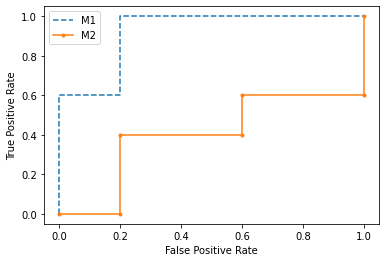

In [49]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

m1_auc = roc_auc_score(df['OUT'], df['M1'])
m2_auc = roc_auc_score(df['OUT'], df['M2'])
print('M1: ROC AUC=%.3f' % (m1_auc))
print('M2: ROC AUC=%.3f' % (m2_auc))

m1_fpr, m1_tpr, _ = roc_curve(df['OUT'], df['M1'])
m2_fpr, m2_tpr, _ = roc_curve(df['OUT'], df['M2'])
# plot the roc curve for the model
pyplot.plot(m1_fpr, m1_tpr, linestyle='--', label='M1')
pyplot.plot(m2_fpr, m2_tpr, marker='.', label='M2')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [51]:
print(0.6*1+0.4*0.8)
print(0.4*0.4+0.4*0.6)


0.92
0.4


#References:
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=a%20ROC%20curve.-,What%20Are%20ROC%20Curves%3F,values%20between%200.0%20and%201.0.


https://mmuratarat.github.io/2019-10-01/how-to-compute-AUC-plot-ROC-by-hand